### Test of the Gauss-Hermite Quadrature Method

In [1]:
import numpy as np
from scipy.special import roots_hermite
import matplotlib.pyplot as plt

Suppose we are interested in calculating $\mathbb E h(Y)$, where

\begin{equation}
    \{Y_t\} \overset{iid}{\sim} N(\mu, \sigma^2).
\end{equation}

The Gauss–Hermite quadrature method claims that

\begin{equation}
    \mathbb E h(Y) 
    \approx \frac{1}{\sqrt{\pi}}
    \sum_{i=1}^n w_i h \left( \sqrt{2} \sigma x_i + \mu \right) ,
\end{equation}
where 

- $n$ : the number of sample points used, 

- $x_i$ : the roots of the physicists' version of the Hermite polynomial $H_n(x), \; i = 1, \cdots,n$, 

- $w_i$ : the associated weights given by
\begin{equation}
    w_i = \frac{2^{n-1} n! \sqrt{\pi}}{n^2 \left[H_{n-1}(x_i) \right]^2}, \quad i = 1, \cdots, n.
\end{equation}

Reference: https://en.wikipedia.org/wiki/Gauss%E2%80%93Hermite_quadrature

In [2]:
n = 15                              # the number of sample points
points, weights = roots_hermite(n)  # the calculated sample points and weights
points = np.sqrt(2) * points        # normalizing the points
weights = weights / np.sqrt(np.pi)  # normalizing the weights

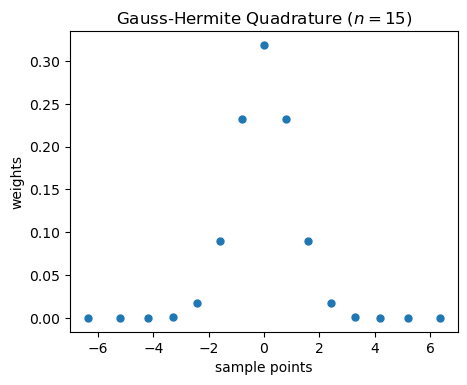

In [3]:
fig, ax = plt.subplots(figsize=(5,3.9))
ax.plot(points, weights, 'o', markersize=5)
ax.set_xlabel('sample points')
ax.set_ylabel('weights')
plt.title(f'Gauss-Hermite Quadrature ($n={n}$)')
plt.show()

### Example 1

Suppose we want to calculate 
$$\mathbb E \exp(sY).$$

In [4]:
μ = 0
σ = 2
s = 2
he = lambda y: np.exp(s*y)

In [5]:
herm_int = np.sum(weights * he(points*σ + μ))
herm_int

2980.680045196393

Recall that, analytically, we have

\begin{equation}
    \mathbb{E} \exp (sY) = \exp \left(s \mu + \frac{s^2 \sigma^2}{2} \right).
\end{equation}

In [6]:
theore_moment = lambda s: np.exp(s*μ + ((s*σ)**2)/2) 

In [7]:
theore_moment(s)

2980.9579870417283

Hence, the Gauss–Hermite quadrature approximates the value of integrals pretty well. 

### Example 2

Suppose we wish to calculate $\mathbb E f(Z_t)$, where
$$Z \sim LN(\mu, \sigma^2).$$

Let $Y := \log Z$. Then
$$Y \sim N(\mu, \sigma^2) 
\quad \text{and} \quad
\mathbb E f(Z) = \mathbb E f(e^{Y}).$$

Therefore, 
$$\mathbb E f(Z) \approx
  \frac{1}{\sqrt{\pi}} \sum_{i=1}^n w_i f\left( e^{\sqrt{2} \sigma x_i + \mu} \right).$$
  
Consider, for example, $f(z) = z^m.$

In [8]:
μ, σ, m = 0., 2., 2.

he2 = lambda z: z**m

herm_int2 = np.sum(weights * he2(np.exp(points*σ + μ)))
herm_int2

2980.6800451963927

Analytically, we have

$$\mathbb E Z^m = \exp \left(m \mu + \frac{m^2 \sigma^2}{2} \right).$$

In [9]:
theore_moment2 = np.exp(m*μ+((m*σ)**2)/2)
theore_moment2

2980.9579870417283